# 1 Data Preparing

## 1.1 Import Library

In [ ]:
# Install library tambahan
!pip install imbalanced-learn

# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## 1.2. Load dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/red-wine-quality-cortez-et-al-2009


In [ ]:
df = pd.read_csv(path + "/winequality-red.csv")

print("\n=== Struktur Data ===")
print(f"Jumlah Sampel: {len(df)}")
print(f"Jumlah Fitur: {len(df.columns)-1}")
print("\n5 Contoh Data:")
print(df.head())


=== Struktur Data ===
Jumlah Sampel: 1599
Jumlah Fitur: 11

5 Contoh Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## 1.3 Data Exploration

In [ ]:
# gambaran dataset red wine quality
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.quality.value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10



Statistik Deskriptif:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000      

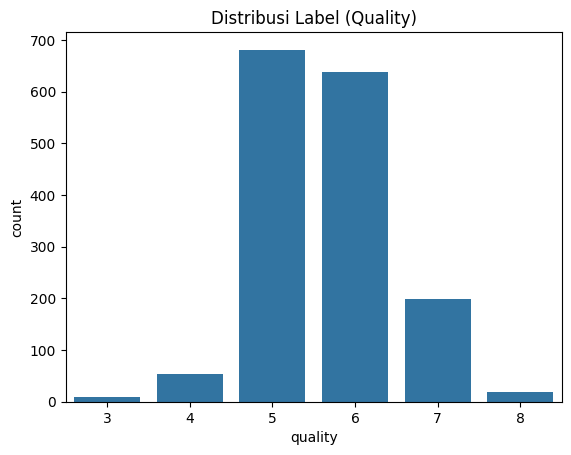

In [ ]:
# Statistik Deskriptif
print("\nStatistik Deskriptif:\n", df.describe())

# Visualisasi distribusi label
sns.countplot(data=df, x='quality')
plt.title('Distribusi Label (Quality)')
plt.show()

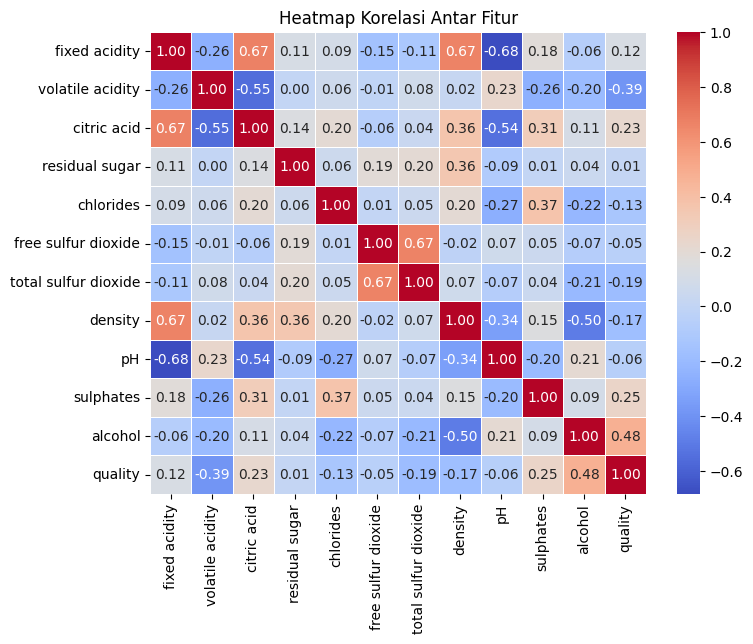

In [ ]:
## Korelasi antar fitur
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

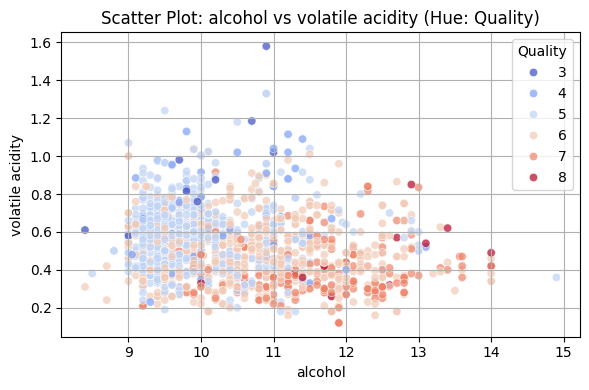

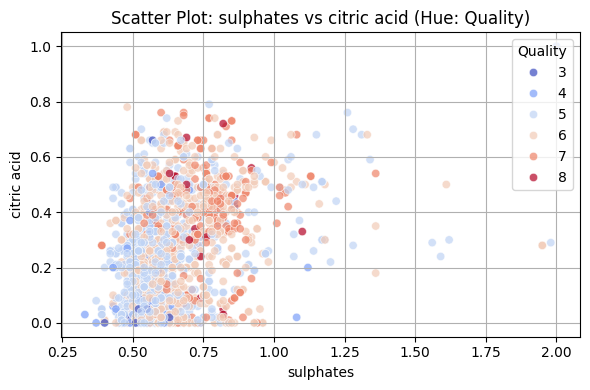

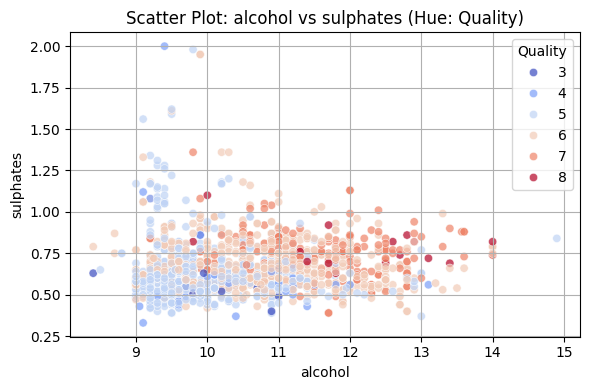

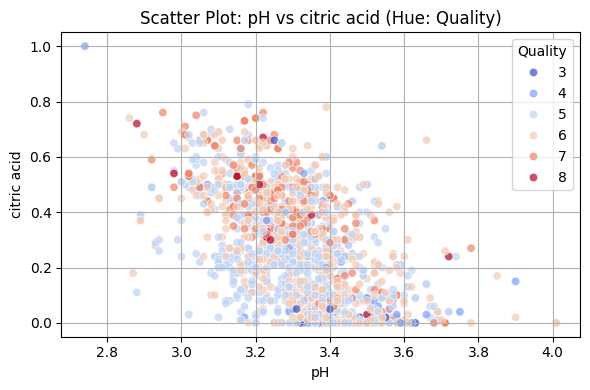

In [ ]:
#Visualisasi Scatter Plot
feature_pairs = [('alcohol', 'volatile acidity'),
                 ('sulphates', 'citric acid'),
                 ('alcohol', 'sulphates'),
                 ('pH', 'citric acid')]

for x_feat, y_feat in feature_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x_feat, y=y_feat, hue='quality', palette='coolwarm', alpha=0.7)
    plt.title(f'Scatter Plot: {x_feat} vs {y_feat} (Hue: Quality)')
    plt.legend(title='Quality')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 2 Preprocessing Data

## 2.1 Data Cleaning

### 2.1.1 Handling Missing Value

In [ ]:
# Cek Missing Value
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Tidak ada missing value yang di temukan untuk semua fitur

### 2.1.2 Handling Duplicate

In [ ]:
# CEK Data Duplikat
df.duplicated().sum()

np.int64(240)

In [ ]:
# Hapus data duplikat
df = df.drop_duplicates()

### 2.1.3 Outliers

In [ ]:
# Deteksi & tangani outlier (IQR method)
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

df_no_outliers = remove_outliers_iqr(df)

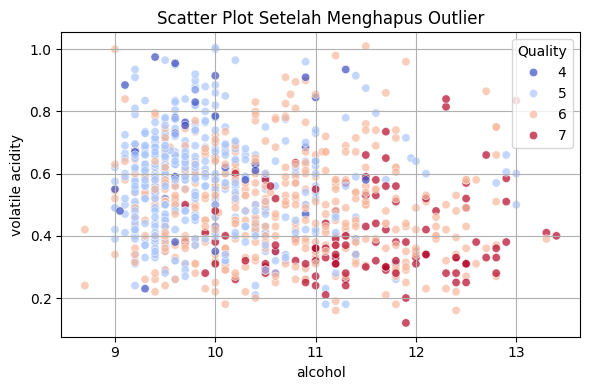

In [ ]:
## Scatter plot setelah outlier dihapus
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_no_outliers, x='alcohol', y='volatile acidity', hue='quality', palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot Setelah Menghapus Outlier')
plt.legend(title='Quality')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_no_outliers.quality.value_counts()

,count
quality,
5,434
6,423
7,115
4,33


## 2.2 Split Data

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

# filter kelas 5,6,7
df_filtered = df_no_outliers[df_no_outliers['quality'].isin([5, 6, 7])].copy()

# split data
from sklearn.model_selection import train_test_split

X = df_filtered.drop('quality', axis=1)
y = df_filtered['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## 2.3 Normalisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_train_nb = minmax_scaler.fit_transform(X_train)
X_test_nb = minmax_scaler.transform(X_test)

## 2.4 SMOTETomek (penanganan imbalance)

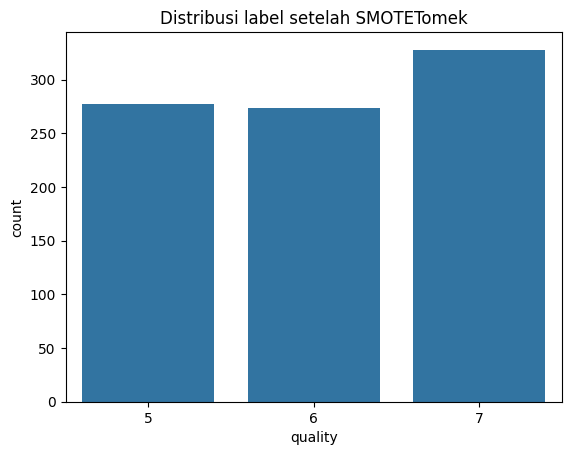

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

sns.countplot(x=y_train_res)
plt.title('Distribusi label setelah SMOTETomek')
plt.show()

# 3 Modeling / Klasifikasi

## 3.1 SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}
svm = SVC(decision_function_shape='ovr', random_state=42)
grid_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_res, y_train_res)

best_svm = grid_svm.best_estimator_
svm_pred = best_svm.predict(X_test)

## 3.2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Latih model Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_res, y_train_res)

# Prediksi
nb_pred = nb_model.predict(X_test)

# 4 Evaluasi dan Visualisasi

## 4.1. Confusion Matrix

In [ ]:
# library untuk evaluasi
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)

In [ ]:
# Evaluasi Model Multiclass SVM
accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, svm_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, svm_pred, average='weighted', zero_division=0)

# Tampilkan hasil
print("Evaluation Multiclass SVM pada Test Set")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


Evaluation Multiclass SVM pada Test Set
Accuracy : 0.4513
Precision: 0.4603
Recall   : 0.4513
F1 Score : 0.4549


In [ ]:
# Evaluasi Model Multinomial Naive Bayes
accuracy = accuracy_score(y_test, nb_pred)
precision = precision_score(y_test, nb_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, nb_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, nb_pred, average='weighted', zero_division=0)

# Tampilkan hasil
print("Evaluation Multiclass Naive Bayes pada Test Set")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


Evaluation Multiclass Naive Bayes pada Test Set
Accuracy : 0.3744
Precision: 0.4934
Recall   : 0.3744
F1 Score : 0.3964


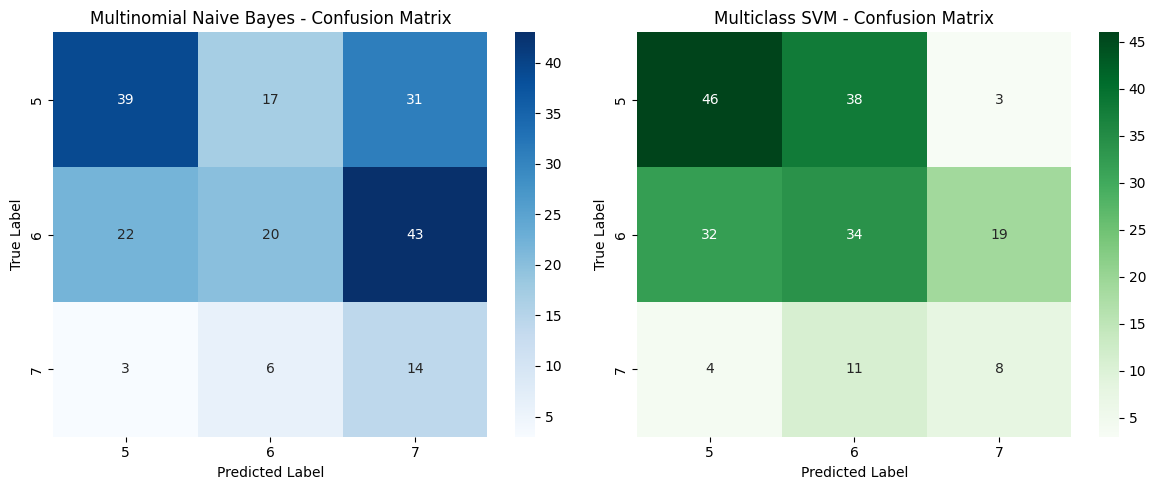

In [ ]:
# Label kelas 5, 6, dan 7
labels = [5, 6, 7]

# confusion matrix dengan label 5, 6, 7
cm_nb = confusion_matrix(y_test, nb_pred, labels=labels)
cm_svm = confusion_matrix(y_test, svm_pred, labels=labels)

plt.figure(figsize=(12, 5))

# Confusion Matrix Naive Bayes
plt.subplot(1, 2, 1)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Multinomial Naive Bayes - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Confusion Matrix SVM
plt.subplot(1, 2, 2)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title('Multiclass SVM - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

## 4.2. Classification Report

In [ ]:
print("Naive Bayes:\n", classification_report(y_test, nb_pred))
print("SVM:\n", classification_report(y_test, svm_pred))

Naive Bayes:
               precision    recall  f1-score   support

           5       0.61      0.45      0.52        87
           6       0.47      0.24      0.31        85
           7       0.16      0.61      0.25        23

    accuracy                           0.37       195
   macro avg       0.41      0.43      0.36       195
weighted avg       0.49      0.37      0.40       195

SVM:
               precision    recall  f1-score   support

           5       0.56      0.53      0.54        87
           6       0.41      0.40      0.40        85
           7       0.27      0.35      0.30        23

    accuracy                           0.45       195
   macro avg       0.41      0.43      0.42       195
weighted avg       0.46      0.45      0.45       195



## 4.3. Grafik Distribusi Prediksi

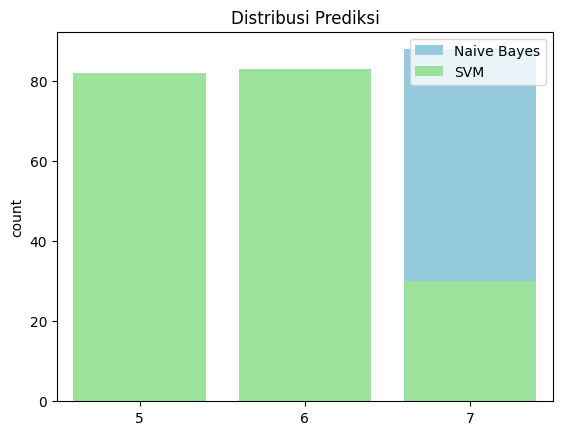

In [ ]:
sns.countplot(x=nb_pred, label="Naive Bayes", color='skyblue')
sns.countplot(x=svm_pred, label="SVM", color='lightgreen')
plt.legend()
plt.title("Distribusi Prediksi")
plt.show()

## 4.4. Tabel perbandingan metrik

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def get_metrics(model_name, y_true, y_pred):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted')
    }

results = []
results.append(get_metrics("Naive Bayes", y_test, nb_pred))
results.append(get_metrics("SVM ", y_test, svm_pred))

results_df = pd.DataFrame(results)
print("\nTabel Perbandingan Model:\n", results_df)


Tabel Perbandingan Model:
          Model  Accuracy  Precision    Recall  F1-Score
0  Naive Bayes  0.374359   0.493383  0.374359  0.396434
1         SVM   0.451282   0.460295  0.451282  0.454918


## 4.5. Grafik batang performa

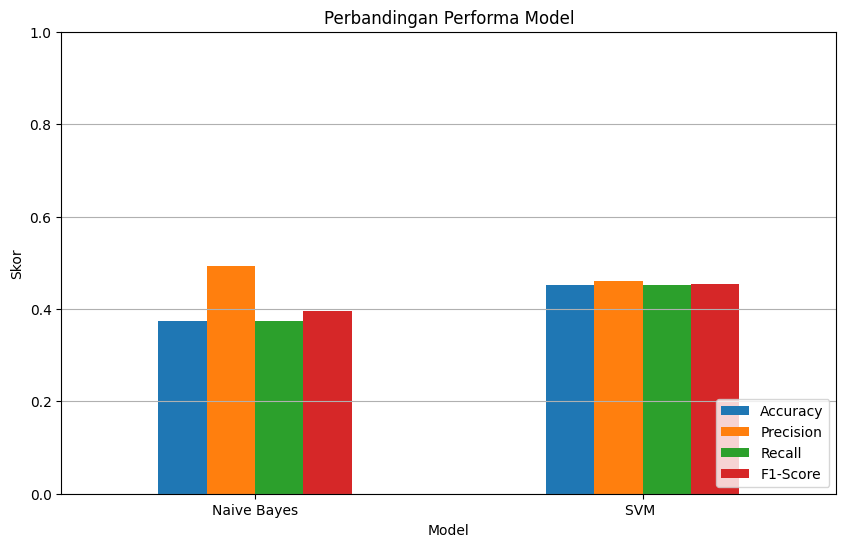

In [ ]:
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(10,6))
plt.title("Perbandingan Performa Model")
plt.ylabel("Skor")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()